In [1]:
%cd '../HOTS'
from Tools import runjit, netparam, histoscore, histoscore_lagorce
import numpy as np

/home/antoine/homhots/HOTS/HOTS


In [2]:
name = 'homhots'
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 50
R = 2
nbclust = [4,8,16]
filt = 2
timestr = '2021-03-28' # this date for 100 digits in learning
record_path = '../Records/EXP_05_POKERDVS/'
#record_path = '../Records/EXP_04_NCARS/'

  5%|▌         | 2/40 [00:00<00:02, 14.20it/s]

training set size: 48 - testing set: 20
clustering...
poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_True
no jitter
sensor formatting...


100%|██████████| 40/40 [01:24<00:00,  2.11s/it]


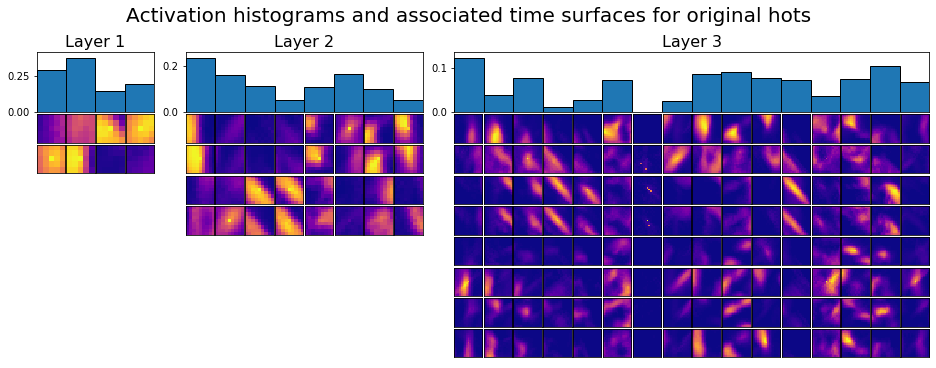

  0%|          | 0/48 [00:00<?, ?it/s]

training...
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl
no jitter


  0%|          | 0/20 [00:00<?, ?it/s]

testing...
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_True_20_[None, None]_histo.pkl
no jitter


100%|██████████| 20/20 [00:42<00:00,  2.14s/it]


../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 80.0% - eucli = 80.0% - norm = 80.0%
Classification scores with entropy: Kullback-Leibler = 80.0% - Jensen-Shannon = 80.0%
Classification scores with k-NN: 3-NN = 60.0% - 6-NN = 65.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_True_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 60.0% - eucli = 55.0% - norm = 55.0%
Classification scores with entropy: Kullback-Leibler = 60.0% - Jensen-Shannon = 60.0%
----------------------------------------------------------------------------------------------------
clustering...
poker
2021-03-28_la

100%|██████████| 40/40 [01:39<00:00,  2.48s/it]


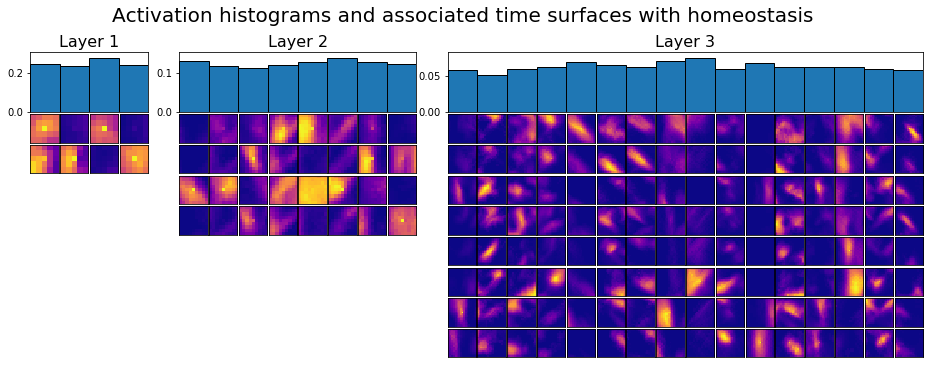

  0%|          | 0/48 [00:00<?, ?it/s]

training...
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_False_48_[None, None]_histo.pkl
no jitter


  0%|          | 0/20 [00:00<?, ?it/s]

testing...
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_False_20_[None, None]_histo.pkl
no jitter


100%|██████████| 20/20 [00:43<00:00,  2.18s/it]

../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_False_48_[None, None]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 55.0% - eucli = 60.0% - norm = 50.0%
Classification scores with entropy: Kullback-Leibler = 60.0% - Jensen-Shannon = 55.0%
Classification scores with k-NN: 3-NN = 45.0% - 6-NN = 55.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[50.0, 500.0, 5000.0]_[2, 4, 8]_False_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 45.0% - eucli = 45.0% - norm = 45.0%
Classification scores with entropy: Kullback-Leibler = 60.0% - Jensen-S

In [3]:
dataset = 'nmnist'
nb_test = 10000
nb_train = 60000
dataset = 'cars'
nb_test = 4396 + 4211
nb_train = 7940 + 7482
ds = 1200
dataset = 'poker'
nb_test = 20
nb_train = 48
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

jit_s = np.arange(0,6,0.4)
jit_t = np.arange(0,300,20)
jit_s, jit_t = jit_s**2, jit_t**2

jitonic= [None,None]
verbose=True
pokerscore = []
pokerscorehom = []
pokerscore_histav = []
pokerscorehom_histav = []
for name in ['hots', 'homhots']:
    for tau in [50]:#[0.01,0.1,0.2,0.4,0.6,0.8,1,2,5,10,20,30]:#[0.1,2,5]:
        print('clustering...')
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        hotshom.plotlayer()
        print('training...')
        #trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='LR')
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
        print('testing...')
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset)
        
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            pokerscore.append(score)
        else:
            pokerscorehom.append(score)
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            pokerscore_histav.append(score)
        else:
            pokerscorehom_histav.append(score)
        

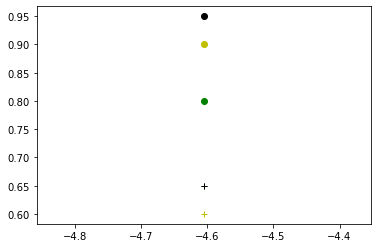

In [6]:
import matplotlib.pyplot as plt
jit = [0.01,0.1,0.2,0.4,0.6,0.8,1,2,5,10,20,30]
for i in range(len(pokerscore)):
    j = np.log(jit[i])
    #plt.plot(j,pokerscore[i][0], 'r +')
    plt.plot(j,pokerscore_histav[i][0], 'g +')
    #plt.plot(j,pokerscorehom[i][0], 'r o')
    plt.plot(j,pokerscorehom_histav[i][0], 'g o')
    #plt.plot(j,pokerscore[i][1], 'b +')
    plt.plot(j,pokerscore_histav[i][1], 'k +')
    #plt.plot(j,pokerscorehom[i][1], 'b o')
    plt.plot(j,pokerscorehom_histav[i][1], 'k o')
    #plt.plot(j,pokerscore[i][2], 'm +')
    plt.plot(j,pokerscore_histav[i][2], 'y +')
    #plt.plot(j,pokerscorehom[i][2], 'm o')
    plt.plot(j,pokerscorehom_histav[i][2], 'y o')
    #plt.plot(j,pokerscore[i][5], 'g *')
    #plt.plot(j,pokerscore_histav[j][2], 'y +')
    #plt.plot(j,pokerscorehom[i][5], 'b *')
    #plt.plot(j,pokerscorehom_histav[j][2], 'y o')
    #plt.plot(j,pokerscore[i][6], 'r *')
    #plt.plot(j,pokerscore_histav[j][2], 'y +')
    #plt.plot(j,pokerscorehom[i][6], 'k *')
    #plt.plot(j,pokerscorehom_histav[j][2], 'y o')